In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset

names_ = []
for i in range(41):
    names_.append('Attribute_{0}'.format(i + 1))
names_.append('Target')

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv', sep=';', names=names_)

In [3]:
# Describing the dataset
df

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,Attribute_11,Attribute_12,Attribute_13,Attribute_14,Attribute_15,Attribute_16,Attribute_17,Attribute_18,Attribute_19,Attribute_20,Attribute_21,Attribute_22,Attribute_23,Attribute_24,Attribute_25,Attribute_26,Attribute_27,Attribute_28,Attribute_29,Attribute_30,Attribute_31,Attribute_32,Attribute_33,Attribute_34,Attribute_35,Attribute_36,Attribute_37,Attribute_38,Attribute_39,Attribute_40,Attribute_41,Target
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,1,0.374,3.233,0.832,10.681,2,0.982,1.144,0,0,0,1.232,1,0,0,0,2.394,-0.007,0,11.254,1.055,2,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,11.029,21,1.043,1.140,0,0,0,1.178,1,0,0,0,2.462,0.000,0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,11.072,9,1.016,1.123,0,1,0,1.261,3,0,0,0,2.314,0.000,0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,11.817,0,1.007,1.093,0,0,0,1.410,147,0,1,2,2.622,0.000,0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [4]:
df.describe()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,Attribute_11,Attribute_12,Attribute_13,Attribute_14,Attribute_15,Attribute_16,Attribute_17,Attribute_18,Attribute_19,Attribute_20,Attribute_21,Attribute_22,Attribute_23,Attribute_24,Attribute_25,Attribute_26,Attribute_27,Attribute_28,Attribute_29,Attribute_30,Attribute_31,Attribute_32,Attribute_33,Attribute_34,Attribute_35,Attribute_36,Attribute_37,Attribute_38,Attribute_39,Attribute_40,Attribute_41
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


In [5]:
df.groupby('Target').size()

Target
NRB    699
RB     356
dtype: int64

In [6]:
# Spitting the dataset into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, stratify = df['Target'], random_state = 42)

In [7]:
train

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,Attribute_11,Attribute_12,Attribute_13,Attribute_14,Attribute_15,Attribute_16,Attribute_17,Attribute_18,Attribute_19,Attribute_20,Attribute_21,Attribute_22,Attribute_23,Attribute_24,Attribute_25,Attribute_26,Attribute_27,Attribute_28,Attribute_29,Attribute_30,Attribute_31,Attribute_32,Attribute_33,Attribute_34,Attribute_35,Attribute_36,Attribute_37,Attribute_38,Attribute_39,Attribute_40,Attribute_41,Target
116,4.523,4.0241,0,0,0,0,0,31.6,2,3,0,-0.913,3.082,1.837,9.454,6,1.021,1.142,0,0,0,1.121,0,0,0,0,2.074,0.048,0,20.676,2.570,0,0,0,0,3.494,3.093,0,7.912,0,0,RB
538,4.303,3.3609,1,0,0,0,0,30.0,0,0,2,0.000,2.965,0.862,9.067,0,1.016,1.133,0,0,0,1.350,1,0,0,0,2.115,0.139,0,0.000,0.956,0,0,1,2,4.123,2.417,2,8.563,0,0,NRB
478,4.861,2.4143,0,0,0,0,2,45.5,0,0,0,0.000,3.186,0.000,9.863,0,0.968,1.113,0,0,0,1.300,3,0,0,0,2.303,-0.007,0,0.000,1.047,0,0,0,0,3.657,1.733,0,8.069,0,0,NRB
119,4.476,3.7418,0,0,0,0,0,30.0,3,2,0,-0.195,2.917,1.500,9.345,2,0.998,1.146,0,0,0,1.153,0,0,0,0,2.042,-0.079,0,10.191,2.340,0,0,0,0,3.389,2.625,0,7.628,0,0,RB
961,5.006,2.3877,1,0,0,0,2,46.9,1,1,0,0.000,3.828,1.202,10.306,4,0.991,1.109,0,0,0,1.295,2,0,0,0,2.334,0.000,0,0.000,2.163,0,0,0,0,3.696,2.075,0,8.888,0,1,NRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,5.375,3.2786,0,0,0,1,3,39.3,4,1,0,0.000,3.351,1.124,10.524,3,0.978,1.126,0,0,0,1.266,1,0,0,0,2.368,0.004,0,0.000,1.671,0,1,0,1,3.766,2.188,0,8.354,0,0,NRB
881,5.313,2.5728,0,0,0,1,0,34.5,3,1,0,1.477,3.215,1.160,10.388,2,0.975,1.136,0,0,0,1.211,1,0,0,0,2.311,-0.007,0,0.000,1.833,1,0,0,1,3.478,2.068,0,7.975,0,0,RB
847,4.383,3.1398,0,0,0,0,0,31.6,1,3,0,-0.678,3.809,3.249,10.063,4,0.980,1.142,0,0,0,1.173,0,0,0,0,2.054,0.000,0,10.339,7.892,0,0,0,2,3.329,2.214,0,8.270,0,0,RB
994,4.709,4.1448,4,0,2,0,0,25.0,0,0,0,1.674,3.751,1.792,10.014,0,0.997,1.115,0,0,0,1.399,0,0,0,0,2.152,-0.007,0,0.000,3.444,0,0,0,0,4.330,2.194,2,9.389,0,0,NRB


In [8]:
train.groupby('Target').size()

Target
NRB    559
RB     285
dtype: int64

In [9]:
names_.remove('Target')

In [10]:
# Getting feature vectors and class labels
X_train = train[names_]
y_train = train.Target
X_test = test[names_]
y_test = test.Target

In [11]:
# Centering and normalizing the feature vectors

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy().squeeze()
y_test = y_test.to_numpy().squeeze()

In [12]:
f = lambda x: 1 if x == 'RB' else -1
f = np.vectorize(f)
y_train = f(y_train)
y_test = f(y_test)

In [13]:
# Binary SVM classifier
from sklearn import svm, metrics
degree_ = 2
c_ = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
kernels_ = ['linear', 'poly', 'rbf']
trainacc = dict()
testacc = dict()

In [14]:
for kernel_ in kernels_:
    cur_trainacc = dict()
    cur_testacc = dict()
    for cc_ in c_:
        clf = svm.SVC(C=cc_, kernel=kernel_, degree=degree_)
        clf.fit(X_train, y_train)
        acc_train = clf.score(X_train, y_train)
        acc_test = clf.score(X_test, y_test)
        cur_trainacc[cc_] = acc_train
        cur_testacc[cc_] = acc_test
    trainacc[kernel_] = cur_trainacc
    testacc[kernel_] = cur_testacc

In [15]:
# Training and test accuracies observed
result_train = pd.DataFrame(trainacc)
result_train

,linear,poly,rbf
1,0.894550,0.840047,0.906398
2,0.898104,0.872038,0.913507
5,0.893365,0.899289,0.931280
10,0.894550,0.926540,0.943128
20,0.894550,0.933649,0.959716
50,0.893365,0.945498,0.970379
100,0.898104,0.959716,0.977488
200,0.896919,0.960900,0.984597
500,0.896919,0.973934,0.992891
1000,0.896919,0.985782,0.995261


In [16]:
result_test = pd.DataFrame(testacc)
result_test

,linear,poly,rbf
1,0.853081,0.772512,0.848341
2,0.857820,0.800948,0.862559
5,0.857820,0.843602,0.876777
10,0.857820,0.862559,0.895735
20,0.862559,0.853081,0.876777
50,0.867299,0.834123,0.862559
100,0.857820,0.867299,0.862559
200,0.857820,0.862559,0.853081
500,0.857820,0.848341,0.838863
1000,0.853081,0.838863,0.838863


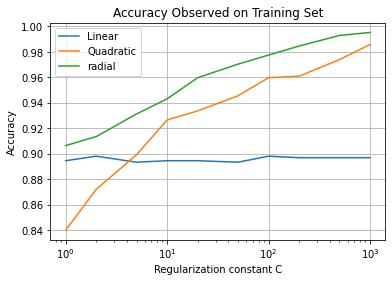

In [17]:
# Visualizing the results obtained
plt.xlabel('Regularization constant C')
plt.ylabel('Accuracy')
plt.grid()
plt.xscale('log')
plt.plot(result_train['linear'], label='Linear')
plt.plot(result_train['poly'], label='Quadratic')
plt.plot(result_train['rbf'], label='radial')
plt.title('Accuracy Observed on Training Set')
plt.legend()
plt.show()

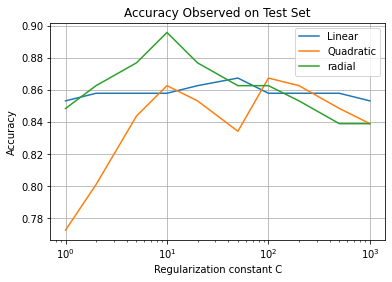

In [18]:
plt.xlabel('Regularization constant C')
plt.ylabel('Accuracy')
plt.grid()
plt.xscale('log')
plt.plot(result_test['linear'], label='Linear')
plt.plot(result_test['poly'], label='Quadratic')
plt.plot(result_test['rbf'], label='radial')
plt.title('Accuracy Observed on Test Set')
plt.legend()
plt.show()

In [19]:
# MLP classifier
from sklearn.neural_network import MLPClassifier as MLP

In [20]:
lr_ = [0.00001, 0.0001, 0.001, 0.01, 0.1]
architecture = {'0 hidden layer': (),
                '1 hidden layer with 2 nodes': (2,),
                '1 hidden layer with 6 nodes': (6,),
                '2 hidden layers with 2 and 3 nodes': (2, 3),
                '2 hidden layers with 3 and 2 nodes': (3, 2)}
results_train = dict()
results_test = dict()

In [21]:
for foo in architecture.keys():
    cur_train = dict()
    cur_test = dict()
    for lr in lr_:
        clf = MLP(hidden_layer_sizes=architecture[foo], solver='sgd', learning_rate_init=lr, max_iter=3000)
        clf.fit(X_train, y_train)
        acc1 = clf.score(X_train, y_train)
        acc2 = clf.score(X_test, y_test)
        cur_train[lr] = acc1
        cur_test[lr] = acc2
    results_train[foo] = cur_train
    results_test[foo] = cur_test

In [28]:
# Observed training accuracy
result = pd.DataFrame(results_train)
result

,0 hidden layer,1 hidden layer with 2 nodes,1 hidden layer with 6 nodes,2 hidden layers with 2 and 3 nodes,2 hidden layers with 3 and 2 nodes
0.00001,0.667062,0.553318,0.645735,0.356635,0.437204
0.00010,0.818720,0.835308,0.760664,0.661137,0.662322
0.00100,0.868483,0.883886,0.892180,0.890995,0.887441
0.01000,0.883886,0.904028,0.937204,0.905213,0.913507
0.10000,0.889810,0.904028,0.953791,0.919431,0.938389


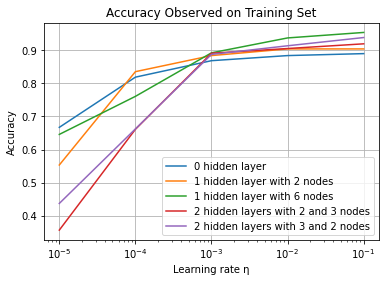

In [29]:
plt.xlabel('Learning rate η')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
for foo in architecture.keys():
    plt.plot(result[foo], label=foo)
plt.title('Accuracy Observed on Training Set')
plt.legend()
plt.show()

In [30]:
# Observed test accuracy
result = pd.DataFrame(results_test)
result

,0 hidden layer,1 hidden layer with 2 nodes,1 hidden layer with 6 nodes,2 hidden layers with 2 and 3 nodes,2 hidden layers with 3 and 2 nodes
0.00001,0.644550,0.573460,0.611374,0.355450,0.445498
0.00010,0.781991,0.819905,0.706161,0.663507,0.663507
0.00100,0.791469,0.819905,0.867299,0.829384,0.848341
0.01000,0.853081,0.876777,0.881517,0.872038,0.815166
0.10000,0.857820,0.886256,0.829384,0.824645,0.838863


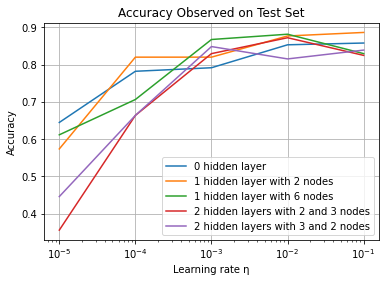

In [31]:
plt.xlabel('Learning rate η')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
for foo in architecture.keys():
    plt.plot(result[foo], label=foo)
plt.title('Accuracy Observed on Test Set')
plt.legend()
plt.show()